In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("C:\\Users\\sudhi\\PycharmProjects\\minor project-1\\CSVs\\channels_summary.csv",index_col=0)

In [11]:
print(df.head())

                 channel_id       channel_name  total_views  total_subscibers  \
0  UCz4a7agVFr1TxU-mpAP8hkw  soch-mangal mohak     54992147            871000   
1  UCdxbhKxr8pyWTx1ExCSmJRw         girliyappa    455443600           4480000   
2  UCGyEq-EoY4Gn4RfknRQxWYw               rvcj    388826112           2740000   
3  UCNyeSfUfffmJXwA2_tmNG9A                tsp    791498214           5420000   
4  UCTlnaHHQ75zlDg_fLr7tGEg         timeliners    802497618           6730000   

   total_videos  avg_duration in mins  avg_frequency in days  \
0           164                 11.60                    7.9   
1           191                  7.38                   11.9   
2           209                  9.00                   12.0   
3           253                  8.63                   10.0   
4           288                  7.08                    7.6   

   channel_age in years  subs gained per day         category  
0                  3.48           685.718784  current affairs  


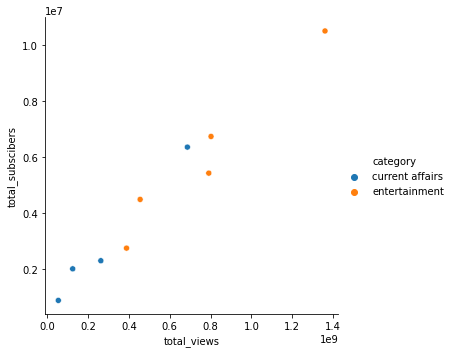

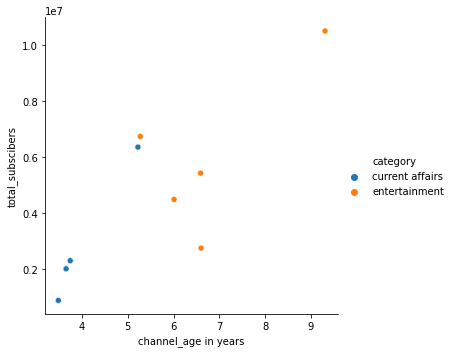

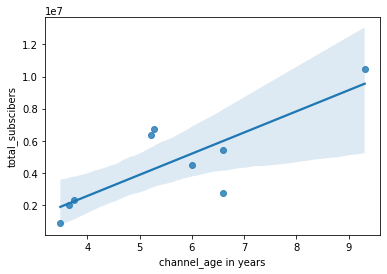

<AxesSubplot:xlabel='avg_frequency in days', ylabel='total_subscibers'>

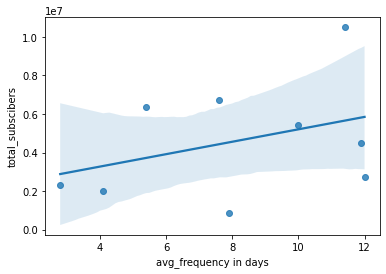

In [12]:
sns.relplot(x='total_views',y='total_subscibers',data=df,kind='scatter',hue='category')
plt.show()
sns.relplot(x='channel_age in years',y='total_subscibers',data=df,kind='scatter',hue='category')
plt.show()
sns.regplot(x='channel_age in years',y='total_subscibers',data=df)
plt.show()
sns.regplot(x='avg_frequency in days',y='total_subscibers',data=df)

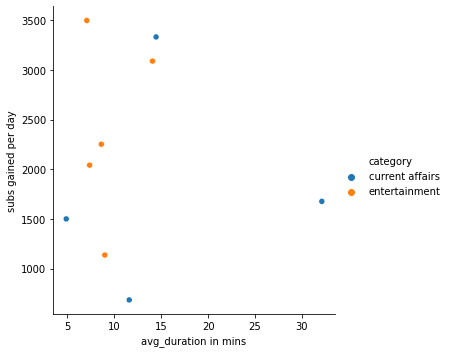

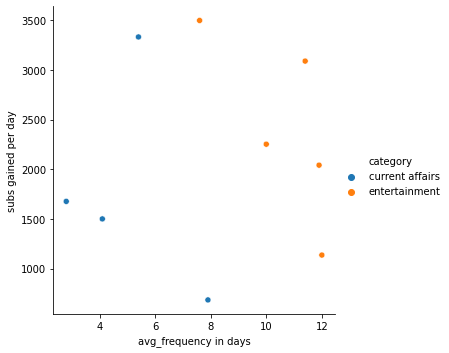

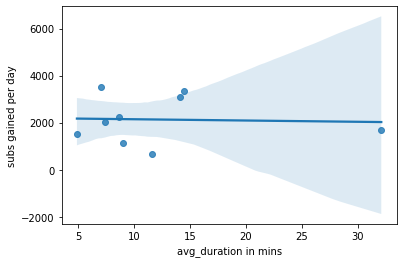

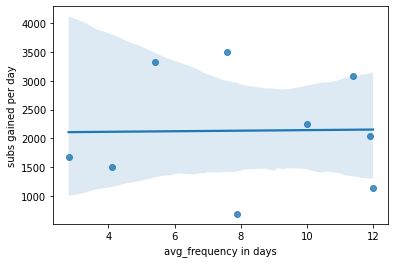

<AxesSubplot:xlabel='channel_age in years', ylabel='subs gained per day'>

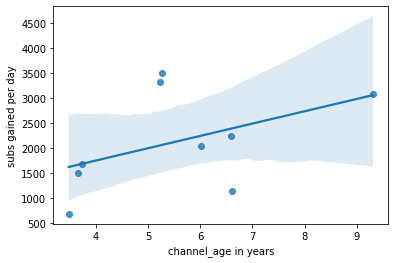

In [13]:
sns.relplot(x='avg_duration in mins',y='subs gained per day',data=df,kind='scatter',hue='category')
sns.relplot(x='avg_frequency in days',y='subs gained per day',data=df,kind='scatter',hue='category')
plt.show()
sns.regplot(x='avg_duration in mins',y='subs gained per day',data=df)
plt.show()
sns.regplot(x='avg_frequency in days',y='subs gained per day',data=df)
plt.show()
sns.regplot(x='channel_age in years',y='subs gained per day',data=df)


In [14]:
import numpy as np

channels_list=['soch-mangal mohak','girliyappa','rvcj',
             'tsp','timeliners','abhi and niyu',
            'tvf','dhruv rathee','the deshbhakt']

path_to_base_directory='C:/Users/sudhi/PycharmProjects/minor project-1/CSVs/'

for channel_name in channels_list:

    df=pd.read_csv(path_to_base_directory+'summary/'+channel_name+'.csv',index_col=0)
    
    
    #we are creating 5 differnt columns for measuring video quality
    
    df['likes Vs dislike ratio']=df['likeCount']/df['dislikeCount']
    df['likes per 1000 views']=(df['likeCount']*1000)/df['viewCount']
    df['dislikes per 1000 views']=(df['dislikeCount']*1000)/df['viewCount']
    df['comment per 1000 views']=(df['commentCount']*1000)/df['viewCount']
    
    #converting duration from the form PT6M17S
        
    duration_in_min=[]
    
    dur=df['duration'].fillna('PT0M0S')
    for d in dur:
        
        #PT6M17S  - this is the format of duration in tables , so converting this into total minutes
        #PT1M1S
        #PT49S
        
        if d[-1]=='S':
            if d[-2].isdigit():
                seconds=d[-2]
            if d[-3].isdigit():
                seconds=d[-3]+seconds
            seconds=int(seconds)
        else:
            seconds=0
        
        if 'M' in d:
            x=d.index('M')
            if d[x-1].isdigit():
                minutes=d[x-1]
            if d[x-2].isdigit():
                minutes=d[x-2]+minutes
            minutes=int(minutes)
        else:
            minutes=0
        
        if 'H' in d:
            x=d.index('H')
            if d[x-1].isdigit():
                hours=d[x-1]
            if d[x-2].isdigit():
                hours=d[x-2]+minutes
            hours=0
        else:
            hours=0
            
        total_minutes=seconds/60+minutes+60*hours
        
        duration_in_min.append(round(total_minutes,2))
    
    
    
    df['duration_in_minutes']=np.array(duration_in_min)
    
    
    #print(df['likes Vs dislike ratio'])
    
    #sns.pairplot(df,kind='reg',vars=['viewCount','likeCount','dislikeCount','commentCount','likes Vs dislike ratio',
      #          'likes per 1000 views','dislikes per 1000 views','comment per 1000 views'])
    #plt.show()
    
    #for X in ['likes Vs dislike ratio','likes per 1000 views','dislikes per 1000 views','comment per 1000 views']:
        #sns.regplot(data=df,y='viewCount',x=X)
        #plt.show()
    #['likeCount','dislikeCount','commentCount','likes Vs dislike ratio','likes per 1000 views','dislikes per 1000 views','comment per 1000 views']:

    ''' Detection '''
    for col in ['likes per 1000 views']:      
        # IQR
        Q1 = np.percentile(df[col], 25,
                           interpolation = 'midpoint')

        Q3 = np.percentile(df[col], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        #print("Old Shape: ", df.shape)

        # Upper bound
        #upper = np.where(df[col] >= (Q3+1.5*IQR))
        print(upper)
        # Lower bound
        #lower = np.where(df[col] <= (Q1-1.5*IQR))
        print(lower)

        ''' Removing the Outliers '''
        #df.drop(upper[0], inplace = True)
        #df.drop(lower[0], inplace = True)

        #print("New Shape: ", df.shape)

    df.to_csv(path_to_base_directory+'summary/'+channel_name+'.csv')

    del df

(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)
(array([ 93, 105, 134, 136], dtype=int64),)
(array([], dtype=int64),)


In [15]:
channels_dic={'tvf':'tvf','girl':'girliyappa','rvcj':'rvcj',
                 'tsp':'tsp','time':'timeliners','abhi':'abhi and niyu',
                  'soch':'soch-mangal mohak','dhruv':'dhruv rathee','deshbhakt':'the deshbhakt'}

path=path_to_base_directory+'summary/'
for v,c in channels_dic.items():

    exec(f"df_{v}=pd.read_csv('{path}'+'{c}'+'.csv',index_col=0)")
    
df_all=pd.concat([df_tvf,df_girl,df_rvcj,df_tsp,df_time,df_abhi,df_soch,df_dhruv,df_deshbhakt], ignore_index=True)

df_all.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna()

print(df_all.info())

for v,c in channels_dic.items():

    exec(f"del df_{v}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2508 non-null   object 
 1   title                    2501 non-null   object 
 2   description              2482 non-null   object 
 3   publishedAt              2501 non-null   object 
 4   duration                 2501 non-null   object 
 5   viewCount                2501 non-null   float64
 6   likeCount                2500 non-null   float64
 7   dislikeCount             2500 non-null   float64
 8   commentCount             2497 non-null   float64
 9   thumbnails               2501 non-null   object 
 10  tags                     2426 non-null   object 
 11  likes Vs dislike ratio   2496 non-null   float64
 12  likes per 1000 views     2498 non-null   float64
 13  dislikes per 1000 views  2498 non-null   float64
 14  comment per 1000 views  

### Viewcount of all videos of different channels

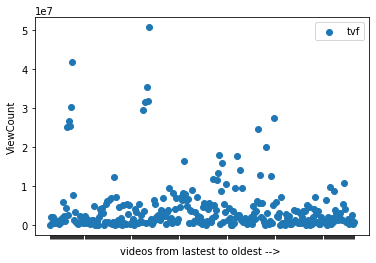

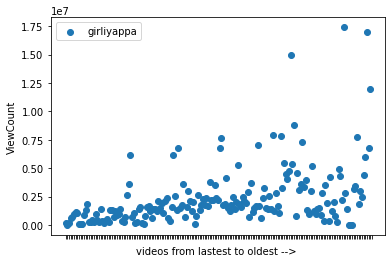

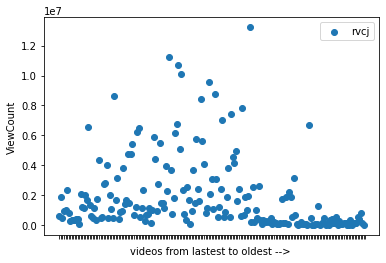

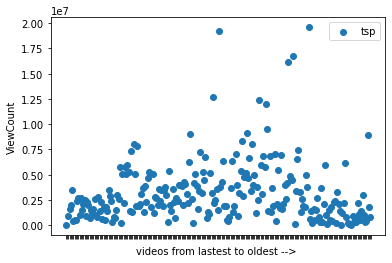

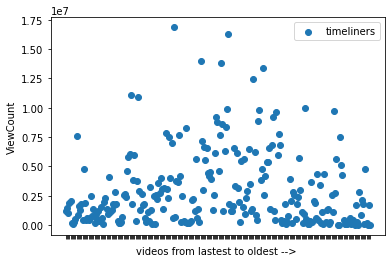

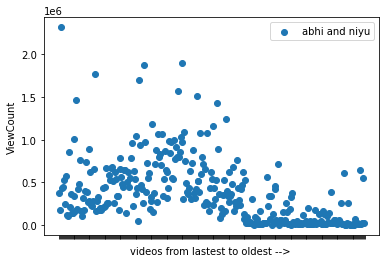

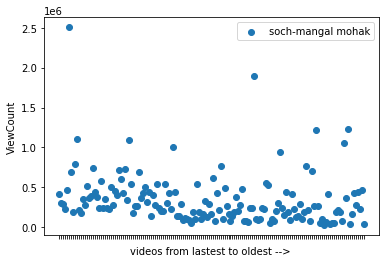

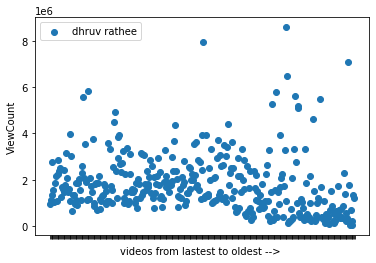

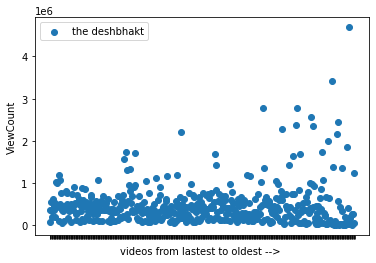

In [16]:

for v,c in channels_dic.items():

    exec(f"df_{v}=pd.read_csv('{path}'+'{c}'+'.csv',index_col=0)")    #reading csv files

    exec(f"plt.scatter(df_{v}['id'],df_{v}['viewCount'],label='{c}')")

    plt.ylabel('ViewCount')
    plt.xlabel('videos from lastest to oldest --> ')
    exec(f"plt.xticks(df_{v}['id'],'')")     # to remove the xtick labels
    plt.legend()
    plt.show()



### ViewCount VS LikesCount

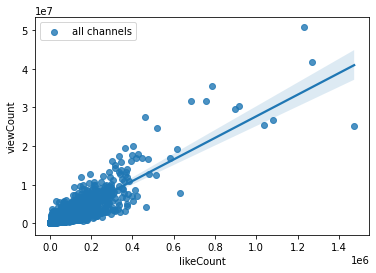

In [10]:
sns.regplot(x='likeCount',y='viewCount',data=df_all,label='all channels')

plt.legend()
plt.show()

### ViewCount VS dislikeCount

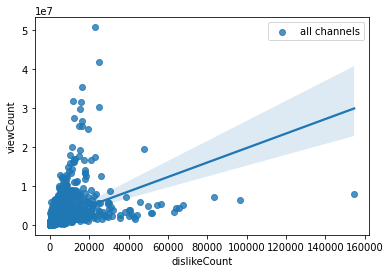

In [11]:
    sns.regplot(x='dislikeCount',y='viewCount',data=df_all,label='all channels')

    plt.legend()
    plt.show()

### ViewCount VS CommentCount

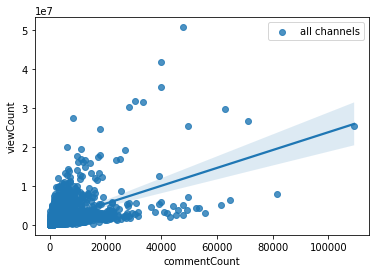

In [12]:
#for v,c in channels_dic.items():

    #exec(f"sns.regplot(x='commentCount',y='viewCount',data=df_{v},label='{c}')")
sns.regplot(x='commentCount',y='viewCount',data=df_all,label='all channels')

plt.legend()
plt.show()

### ViewCount VS Duration

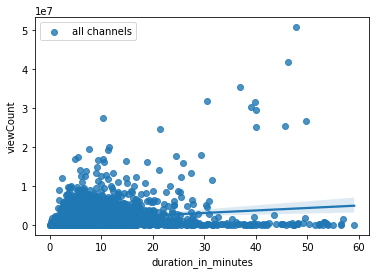

In [13]:

    sns.regplot(x='duration_in_minutes',y='viewCount',data=df_all,label='all channels')

    plt.legend()
    plt.show()

### ViewCount VS like/dislike ratio

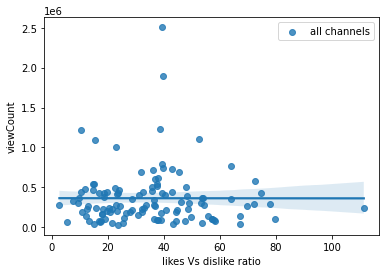

In [14]:

    sns.regplot(x='likes Vs dislike ratio',y='viewCount',data=df_all.dropna(),label='all channels')

    plt.legend()
    plt.show()

### ViewCount VS likes per 1000 views


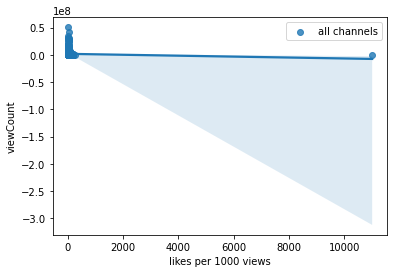

In [15]:

    sns.regplot(x='likes per 1000 views',y='viewCount',data=df_all,label='all channels')

    plt.legend()
    plt.show()

### ViewCount VS dislikes per 1000 views

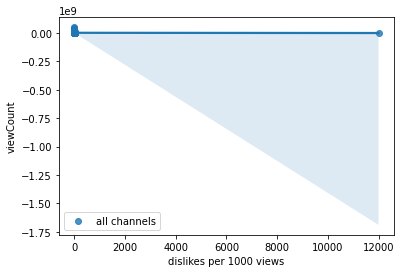

In [16]:

    sns.regplot(x='dislikes per 1000 views',y='viewCount',data=df_all,label='all channels')

    plt.legend()
    plt.show()

### ViewCount VS comment per 1000 views

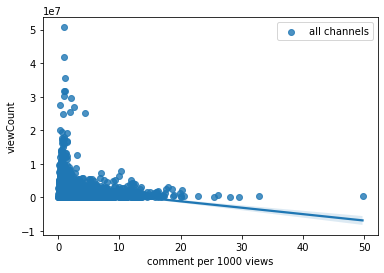

In [17]:

    sns.regplot(x='comment per 1000 views',y='viewCount',data=df_all,label='all channels')

    plt.legend()
    plt.show()

In [18]:
def best_20pct_video(viewcount,top20):
    if viewcount>top20:
        return str('yes')
    else:
        return str('no')
    
    
for v,c in channels_dic.items():
    
    exec(f"x=np.nanpercentile(df_{v}['viewCount'],80)")
    exec(f"df_{v}['top20_classified']=df_{v}['viewCount'].apply(best_20pct_video,top20={x})")
    
    exec(f"df_{v}.to_csv('{path_to_base_directory}'+'summary/'+'{c}'+'.csv')")

In [19]:

df_all=df_all.dropna()
X=df_all.loc[:,['likeCount','dislikeCount','commentCount','likes Vs dislike ratio','likes per 1000 views','dislikes per 1000 views','comment per 1000 views','duration_in_minutes']].astype(np.float64)
print(X.info())

y=df_all.loc[:,['top20_classified']].astype('str')
print(y.info())

df_all.to_csv(path_to_base_directory+'all_summary.csv')
#df_all = df_all.reset_index()

# np.any(np.isnan(df_all))

# np.all(np.isfinite(df_all))

df_all.isna().any()
#print(np.isinf(df_all).values.sum())

#np.isfinite(df_all.all())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1511 to 1664
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   likeCount                117 non-null    float64
 1   dislikeCount             117 non-null    float64
 2   commentCount             117 non-null    float64
 3   likes Vs dislike ratio   117 non-null    float64
 4   likes per 1000 views     117 non-null    float64
 5   dislikes per 1000 views  117 non-null    float64
 6   comment per 1000 views   117 non-null    float64
 7   duration_in_minutes      117 non-null    float64
dtypes: float64(8)
memory usage: 8.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1511 to 1664
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   top20_classified  117 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB
None


id                         False
title                      False
description                False
publishedAt                False
duration                   False
viewCount                  False
likeCount                  False
dislikeCount               False
commentCount               False
thumbnails                 False
tags                       False
likes Vs dislike ratio     False
likes per 1000 views       False
dislikes per 1000 views    False
comment per 1000 views     False
duration_in_minutes        False
title_len                  False
desc_len                   False
tags_len                   False
top20_classified           False
thumbnail_text             False
dtype: bool

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

scaled_X=scale(X)
# scaler = StandardScaler()
# scaled_X = scaler.fit_transform(X)


In [21]:
knn=KNeighborsClassifier()
param_grid= {'n_neighbors':np.arange(1,50)}
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y.values.ravel())   # .values.ravel() was used to change the pandas series to 1d array . because 1d array is expected here .
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 13}
0.9315217391304348


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=21)
y_pred=knn_cv.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37  1]
 [ 3  6]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95        38
         yes       0.86      0.67      0.75         9

    accuracy                           0.91        47
   macro avg       0.89      0.82      0.85        47
weighted avg       0.91      0.91      0.91        47

